# Excercises

In [5]:
library(repr)
options(repr.plot.width=8, repr.plot.height=2.5)

[1] 1.157628

[1] 1.162839

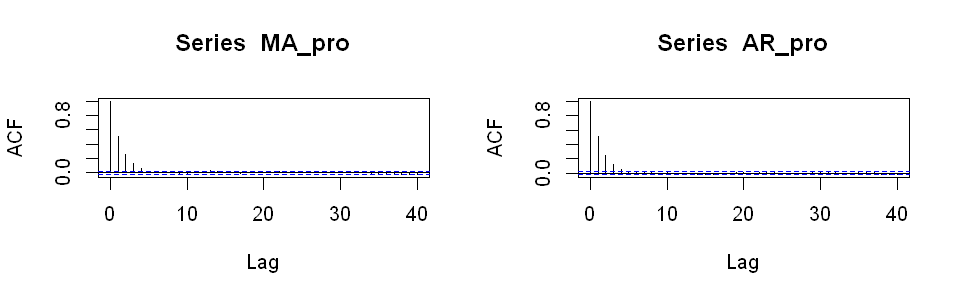

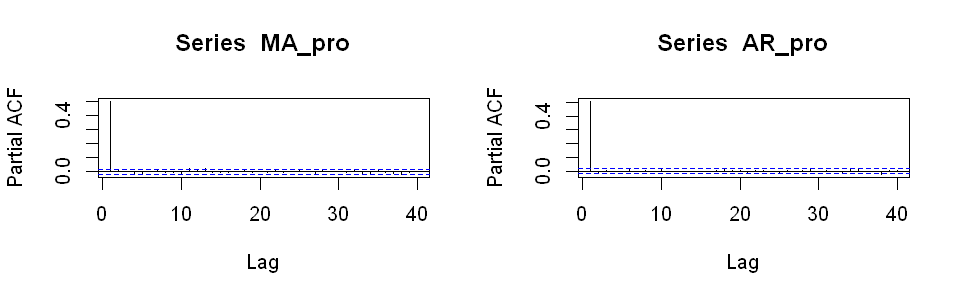

In [6]:
# MA(inf) from AR(1)
MA <- ARMAtoMA(ar = 0.5, ma = 0, lag.max=1000)

# AR(inf) from MA(1)
# AR <- ARMAtoMA(ar = -0.8, ma = 0, lag.max=10)

# Check if MA(inf) equals AR(1)
AR_pro <- arima.sim(n = 10000, list(order=c(1,0,0), ar=c(0.5)))

MA_pro <- arima.sim(n = 10000, list(order=c(0,0,1000), ma=MA))

sd(MA_pro)
sd(AR_pro)

par(mfrow=c(1,2))
acf(MA_pro)
acf(AR_pro)
par(mfrow=c(1,2))
pacf(MA_pro)
pacf(AR_pro)

# Chapter 3
Volatility modeling
## Exercise 1
Empirical regularities about volatility. GARCH(1; 1) example. Part I, (…rst session) In moodle a text …le named exchange.dat has been posted. In this exercise you will
look at various summary statistics and plots to get an (empirical) feeling about return series.
1.

In [7]:
library(readr)
exchange <- read_csv("~/GitHub/Applied-Econometric-Time-Series-WE/Data/exchange.dat", col_names=F, cols(
  X1 = col_double()))
head(exchange)

X1
2.24
2.26
2.29
2.26
2.27
2.30


- Plot the exchange rate and the autocovariance function (correllogram) of the series.
Does the mean look constant over time?

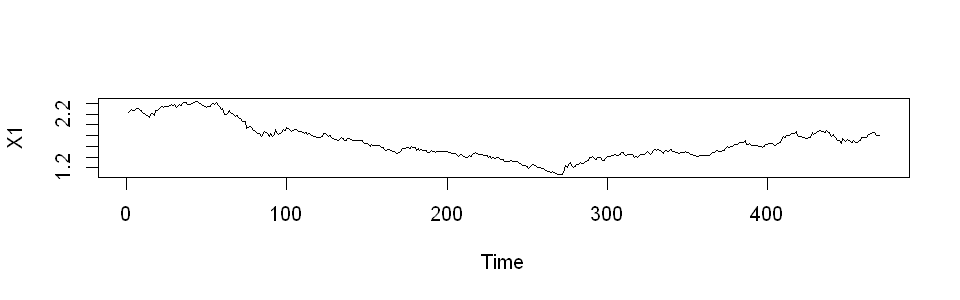

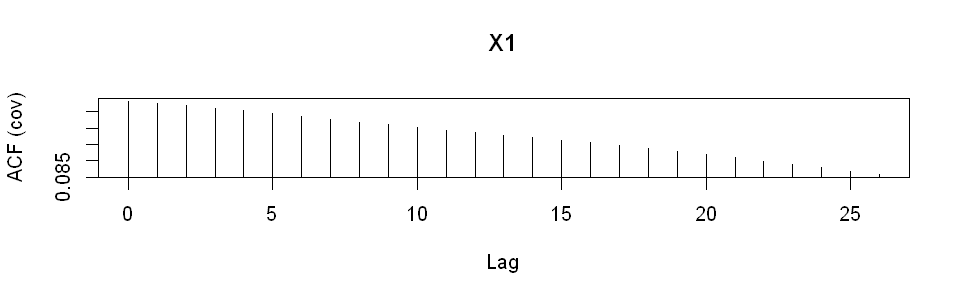

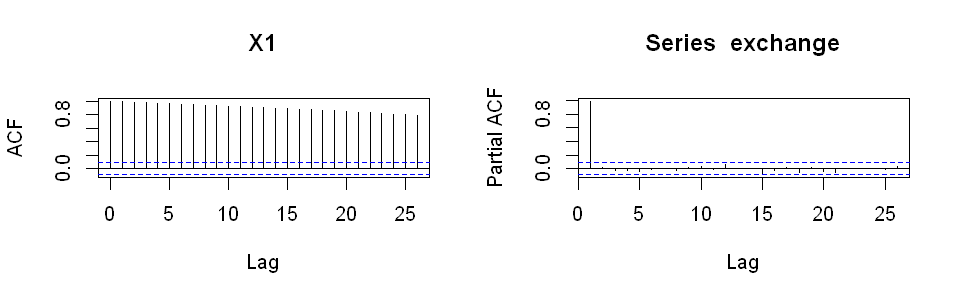

In [8]:
exchange <- as.ts(exchange)

plot(exchange, type="l")
acf(exchange, type="covariance")
par(mfrow=c(1,2))
acf(exchange)
pacf(exchange)

- Calculate the period-by-period returns and the correllogram. Alternatively, use log-di¤erences. Does the mean now look constant over time? Plot a histogram and possibly also a normal approximation of the histogram. Is the return series approximately normal distributed or do you see "fat tails"?

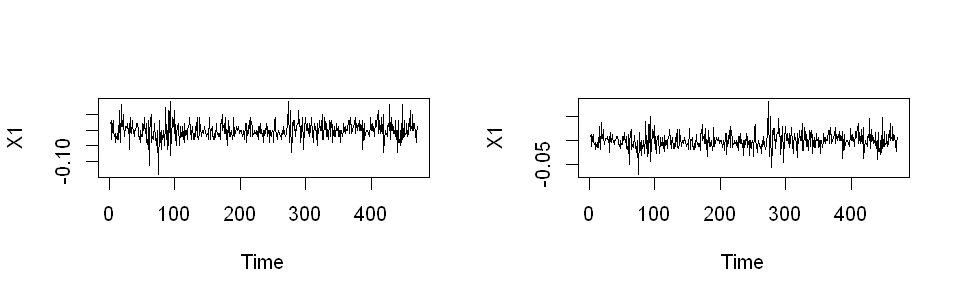

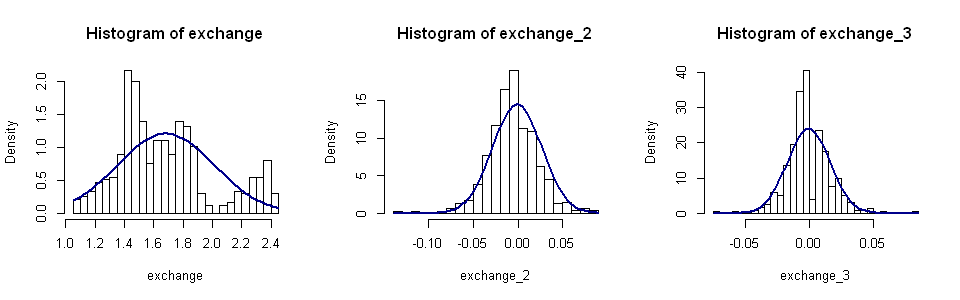

In [9]:
exchange_2 <- diff(exchange)
exchange_3 <- diff(log(exchange))


par(mfrow=c(1,2))
plot(exchange_2, type="l")
plot(exchange_3, type="l")

par(mfrow=c(1,3))
hist(exchange, breaks=30, prob=T)
curve(dnorm(x, mean=mean(exchange), sd=sd(exchange)), 
      col="darkblue", lwd=2, add=TRUE, yaxt="n")
hist(exchange_2, breaks=30, prob=T)
curve(dnorm(x, mean=mean(exchange_2), sd=sd(exchange_2)), 
      col="darkblue", lwd=2, add=TRUE, yaxt="n")
hist(exchange_3, breaks=30, prob=T)
curve(dnorm(x, mean=mean(exchange_3), sd=sd(exchange_3)), 
      col="darkblue", lwd=2, add=TRUE, yaxt="n")

- Calculate the squared returns or alternatively the squared deviations from the mean. Plot the correllogram of the series. What do you see? Comment on your results.

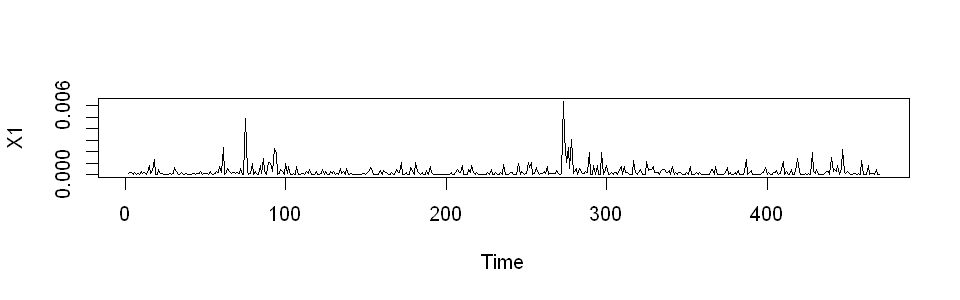

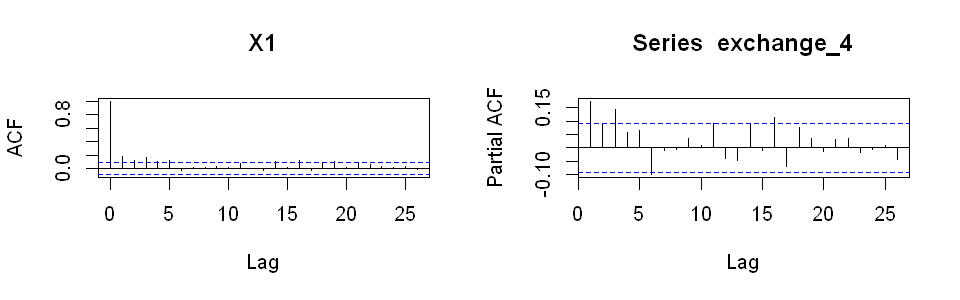

In [10]:
exchange_4 <- exchange_3^2

plot(exchange_4, type="l")
par(mfrow=c(1,2))
acf(exchange_4)
pacf(exchange_4)

- Plot the the of the model versus observed data, in particular plot ht . Does this makes sense compared to observed squared returns.
$$ r_t = \mu + \sqrt{h_t}z_t, \quad z_t \sim iid N (0,1)$$
$$ h_t = \omega + \alpha(r_{t-1} - \mu)^2 + \beta h_{t-1}$$

In [32]:
#auto.arima(exchange_4)
library(tseries)
library(rugarch)

spec <- ugarchspec(mean.model = list(armaOrder = c(0, 0)), distribution = "std")
m1 <- ugarchfit(spec, exchange_4)

m2 <- garch(exchange_4, order=c(1,1))
m2


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     2.759991e-07     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -3.232e+03
     1   22 -3.234e+03  6.41e-04  4.95e-03  1.0e-06  1.6e+15  1.0e-07  3.91e+12
     2   23 -3.235e+03  4.94e-04  3.51e-04  8.4e-07  2.0e+00  1.0e-07  6.18e-02
     3   24 -3.236e+03  5.55e-05  7.82e-05  7.4e-07  2.0e+00  1.0e-07  9.73e-02
     4   25 -3.236e+03  6.00e-06  6.52e-06  7.8e-07  2.0e+00  1.0e-07  8.75e-02
     5   26 -3.236e+03  3.72e-08  4.38e-08  7.8e-07  2.0e+00  1.0e-07  8.83e-02
     6   27 -3.236e+03  5.69e-10  7.74e-10  7.8e-07  2.0e+00  1.0e-07  8.83e-02
     7   37 -3.236e+03  1.69e-04  2.78e-04  2.2e-01  2.0e+00  3.8e-02  8.83e-02
     8   40 -3.239e+03  7.68e-04  8.47e-04  5.0e-01  1.9e+00  1.5e-01  1.23e-01
     9   41 -3.240e+03  4.83e-04  6.06e-04  2.5e-01 

Warning message in garch(exchange_4, order = c(1, 1)):
"singular information"


Call:
garch(x = exchange_4, order = c(1, 1))

Coefficient(s):
       a0         a1         b1  
1.128e-07  4.323e-02  6.460e-01  


In [12]:
fit <- fitted(m1)
head(fit)

                   [,1]
0002-01-01 0.0001133401
0003-01-01 0.0001133401
0004-01-01 0.0001133401
0005-01-01 0.0001133401
0006-01-01 0.0001133401
0007-01-01 0.0001133401

[1] 0.0002763904

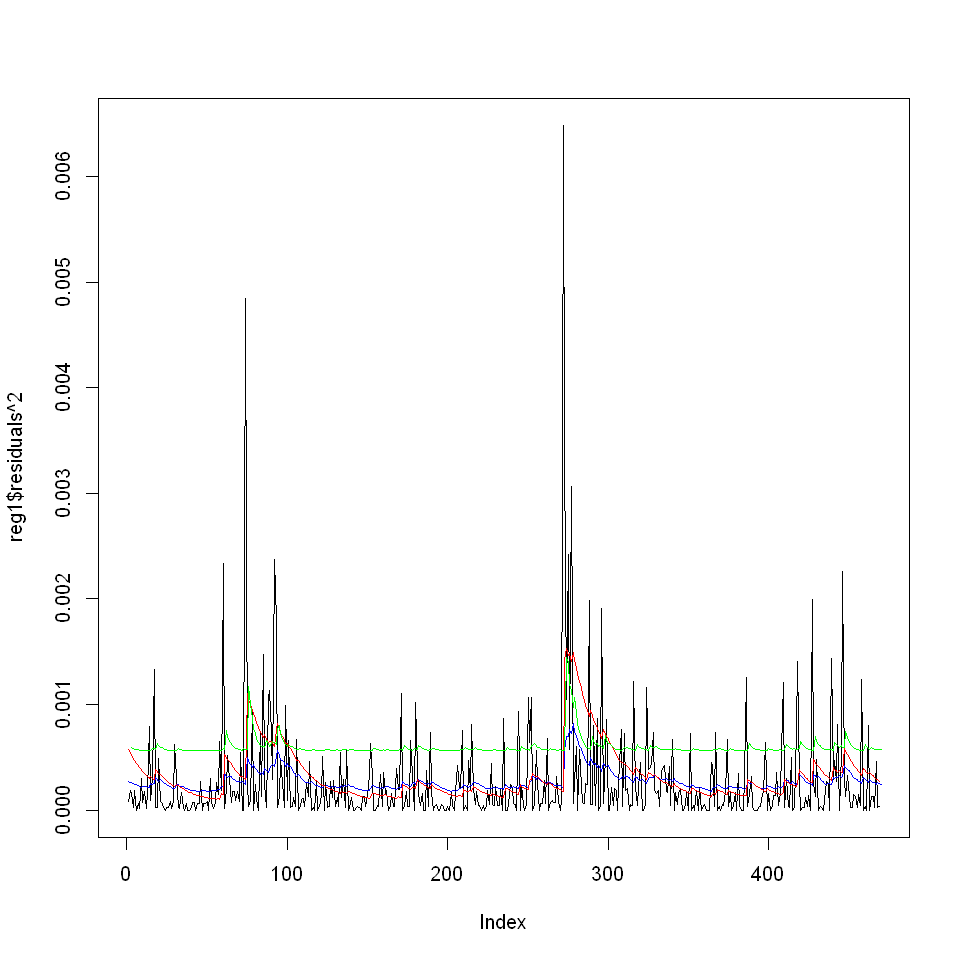

In [13]:
options(repr.plot.width=8, repr.plot.height=8)

reg1 <- lm(exchange_3 ~ 1)

a <- 0.054421
b <- 0.88582
w <- 0.000016421

u <- reg1$coef
h <- c(var(reg1$residuals))
h


for (i in 2:470) {
    h[i] <- w + a*(exchange_3[i-1] - u)^2 + (b * h[i-1])
}


plot(reg1$residuals^2, col="black", type="l")
lines(h, type="l", col="blue")
lines(m1@fit[["sigma"]], type="l", col="red")
lines(m2$fit[,1], type="l", col="green")





## Exercise 2. 
Enders exercise 5 chapter 3


In [14]:
options(repr.plot.width=8, repr.plot.height=2.5)

arch <- read_delim("~/GitHub/Applied-Econometric-Time-Series-WE/Data/arch.csv", 
    ";", escape_double = FALSE, locale = locale(decimal_mark = ",", 
        grouping_mark = "."), trim_ws = TRUE, col_types = cols(.default = col_double())
)
head(arch)

y,y_m
1.2730,1.4323
0.2211,1.4064
0.5709,0.6849
0.2239,0.7005
1.5600,1.1220
1.5800,0.8773


In [15]:
mean(arch$y)
sd(arch$y)
min(arch$y)
max(arch$y)

[1] 0.2633695

[1] 4.894091

[1] -10.8

[1] 15.15

In [16]:
library(dynlm)

arch$y <- as.ts(arch$y)

reg <- dynlm(arch$y ~ L(arch$y,1))
reg

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




Time series regression with "ts" data:
Start = 2, End = 100

Call:
dynlm(formula = arch$y ~ L(arch$y, 1))

Coefficients:
 (Intercept)  L(arch$y, 1)  
     0.06219       0.94387  


In [17]:
acf(reg$residuals, plot=F, type="correlation", lag=10)
pacf(reg$residuals, plot=F, type="correlation", lag=10)


Autocorrelations of series 'reg$residuals', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.149  0.005 -0.017 -0.012  0.069  0.003 -0.099 -0.150  0.065  0.101 


Partial autocorrelations of series 'reg$residuals', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.149 -0.018 -0.016 -0.007  0.073 -0.019 -0.099 -0.123  0.112  0.073 

In [18]:
Box.test(reg$residuals,lag=4,type="Ljung-Box")
Box.test(reg$residuals,lag=8,type="Ljung-Box")
Box.test(reg$residuals,lag=24,type="Ljung-Box")


	Box-Ljung test

data:  reg$residuals
X-squared = 2.3256, df = 4, p-value = 0.6761



	Box-Ljung test

data:  reg$residuals
X-squared = 6.382, df = 8, p-value = 0.6045



	Box-Ljung test

data:  reg$residuals
X-squared = 18.501, df = 24, p-value = 0.7781


In [84]:
sres <- reg$residuals^2

acf(sres, plot=F, type="correlation", lag=10)
pacf(sres, plot=F, type="correlation", lag=10)

library(forecast)
auto.arima(sres)


Autocorrelations of series 'sres', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.469  0.127 -0.051 -0.081  0.057  0.240  0.274  0.224  0.140 -0.014 


Partial autocorrelations of series 'sres', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.469 -0.120 -0.080 -0.011  0.143  0.194  0.078  0.071  0.058 -0.073 

Series: sres 
ARIMA(0,1,0) 

sigma^2 estimated as 29.23:  log likelihood=-304.45
AIC=610.9   AICc=610.94   BIC=613.48

In [85]:
reg2 <- dynlm(sres ~ L(sres,1))
reg2



Time series regression with "ts" data:
Start = 3, End = 100

Call:
dynlm(formula = sres ~ L(sres, 1))

Coefficients:
(Intercept)   L(sres, 1)  
     1.5583       0.4706  


In [92]:
length(sres)*summary(reg2)$r.squared
a <- ((summary(reg)$r.squared - summary(reg2)$r.squared)/1)/(summary(reg2)$r.squared/(length(sres)-(2*1)-1))
a

[1] 21.88564

[1] 285.028

In [22]:
arch$y

Time Series:
Start = 1 
End = 100 
Frequency = 1 
  [1]   1.273000   0.221100   0.570900   0.223900   1.560000   1.580000
  [7]  -1.627000   0.006158   1.958000   0.366900   1.122000  -0.313400
 [13]  -0.125800  -0.175000   0.716600  -0.139500  -0.734000  -0.046790
 [19]  -0.096180  -0.130400  -0.212700   0.423300  -1.103000  -0.380600
 [25]  -0.764200   0.628800  -0.619000  -0.340200  -0.076230   0.294100
 [31]   0.111200  -0.054890   0.998800  -0.509400  -0.952100  -0.090070
 [37]   1.430000   1.722000   0.914600  -1.945000  -0.093250   0.811700
 [43]  -0.324500   1.092000   0.209300   2.205000   2.316000   2.942000
 [49]   1.732000   1.007000  -0.360900  -1.781000  -1.087000  -2.950000
 [55]   0.971800   1.883000  -0.267900  -2.100000  -0.686000  -1.923000
 [61]  -4.390000  -7.386000  -9.994000 -10.770000 -10.800000  -9.800000
 [67]  -9.178000  -7.006000  -5.825000  -6.793000  -7.697000  -5.696000
 [73]  -4.589000  -4.309000  -3.430000  -2.124000  -0.949300   1.136000
 [79]  -0.8274

## Exercise 3 
Enders exercise 6 chapter 3

In [42]:
mm <- arima(arch$y_m, order=c(0,0,6), fixed=c(0,0,NA,0,0,NA,NA))
mm


Call:
arima(x = arch$y_m, order = c(0, 0, 6), fixed = c(0, 0, NA, 0, 0, NA, NA))

Coefficients:
      ma1  ma2     ma3  ma4  ma5      ma6  intercept
        0    0  0.2595    0    0  -0.2541     1.0712
s.e.    0    0  0.1125    0    0   0.1154     0.0478

sigma^2 estimated as 0.2227:  log likelihood = -67.19,  aic = 142.37

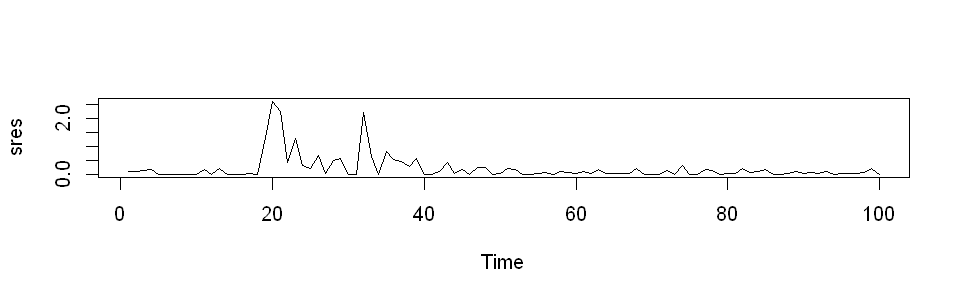


Autocorrelations of series 'sres', by lag

    0     1     2     3     4     5     6 
1.000 0.498 0.256 0.292 0.163 0.047 0.121 


Partial autocorrelations of series 'sres', by lag

     1      2      3      4      5      6 
 0.498  0.010  0.214 -0.088 -0.039  0.106 

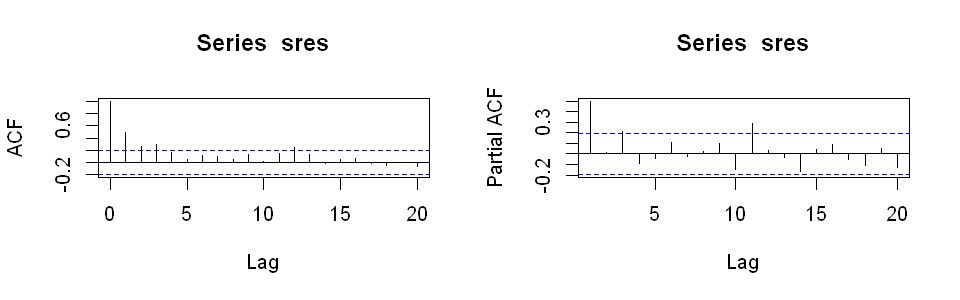

In [48]:
sres <- mm$residuals^2

plot(sres, type="l")
par(mfrow=c(1,2))
acf(sres)
pacf(sres)
acf(sres, plot=F, lag=6)
pacf(sres, plot=F, lag=6)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     1.927543e-01     1.000e+00
     2     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -3.000e+01
     1    3 -3.746e+01  1.99e-01  3.37e-01  2.7e-01  1.3e+03  1.0e-01  2.13e+02
     2    5 -3.936e+01  4.83e-02  6.22e-02  1.1e-01  1.2e+01  4.2e-02  5.27e+01
     3    7 -4.128e+01  4.64e-02  7.49e-02  2.3e-01  5.3e+00  1.1e-01  2.98e+00
     4   10 -4.157e+01  6.89e-03  1.46e-02  2.7e-02  5.6e+00  1.6e-02  4.16e-01
     5   11 -4.168e+01  2.85e-03  2.73e-03  2.4e-02  2.1e+00  1.6e-02  5.34e-02
     6   12 -4.199e+01  7.28e-03  8.56e-03  5.0e-02  1.6e+00  3.1e-02  3.94e-02
     7   14 -4.243e+01  1.04e-02  1.05e-02  1.3e-01  2.6e-01  9.5e-02  1.09e-02
     8   15 -4.253e+01  2.23e-03  1.70e-03  5.1e-02  0.0e+00  4.5e-02  1.70e-03
     9   16 -4.255e+01  4.45e-04  3.70e-04  3.2e-02  0.0e+00  3.0e-02  3.70e-04
    10   1


Call:
garch(x = sres, order = c(0, 1))

Coefficient(s):
    a0      a1  
0.1185  0.5022  


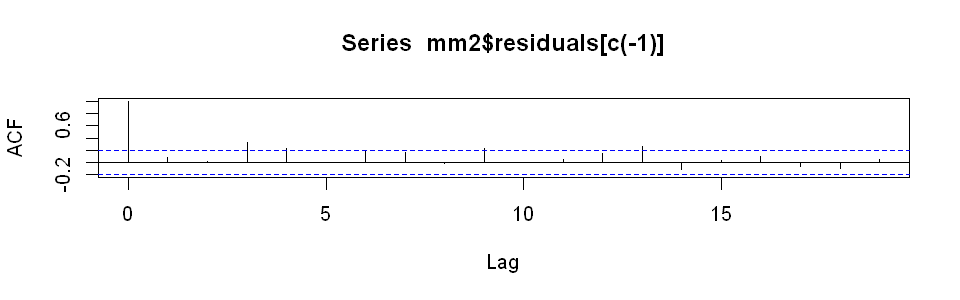

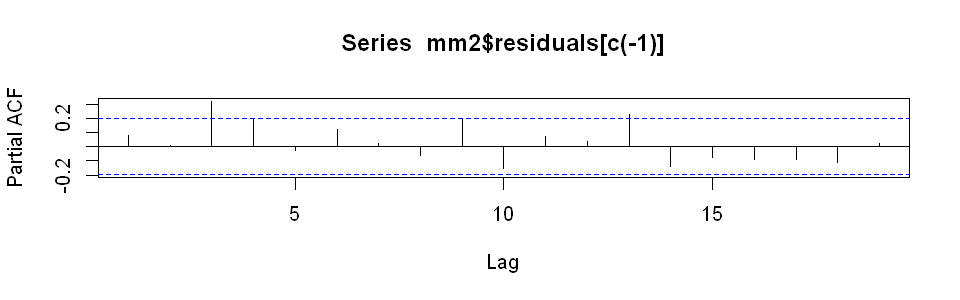

In [74]:
mm2 <- garch(sres, order=c(0,1))
mm2

acf(mm2$residuals[c(-1)])
pacf(mm2$residuals[c(-1)])

Series: sres 
ARIMA(0,1,2) 

Coefficients:
          ma1      ma2
      -0.4490  -0.3721
s.e.   0.0977   0.1041

sigma^2 estimated as 0.1556:  log likelihood=-47.87
AIC=101.73   AICc=101.99   BIC=109.52


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     1.826094e-01     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -3.128e+01
     1    3 -3.896e+01  1.97e-01  3.08e-01  2.8e-01  1.2e+03  1.0e-01  1.85e+02
     2    5 -4.032e+01  3.37e-02  4.05e-02  7.6e-02  1.3e+01  2.8e-02  4.65e+01
     3    6 -4.108e+01  1.86e-02  2.15e-02  7.0e-02  4.5e+00  2.8e-02  4.52e+00
     4    7 -4.144e+01  8.70e-03  3.44e-02  1.2e-01  4.7e+00  5.6e-02  2.43e+00
     5    8 -4.227e+01  1.95e-02  3.78e-02  8.2e-02  1.9e+00  5.6e-02  2.98e-01
     6    9 -4.237e+01  2.26e-03  1.56e-02  8.0e-02  1.9e+00  5.6e-02  6.18e-02
     7   10 -4.273e+01  8.49e-03  1.89e-02  9.1e-02  2.0e+00  5.6e-02  8.14e-01
     8   12 -4.279e+01  1.50e-03  2.36e-03  8.6e-03  5.9e+01  5.6e-03  1.24e-01
     9   13 -4.282e+01  5.48e-04  5.83e-04  7.9e-03 


Call:
garch(x = sres, order = c(0, 2))

Coefficient(s):
     a0       a1       a2  
0.11215  0.41163  0.08194  


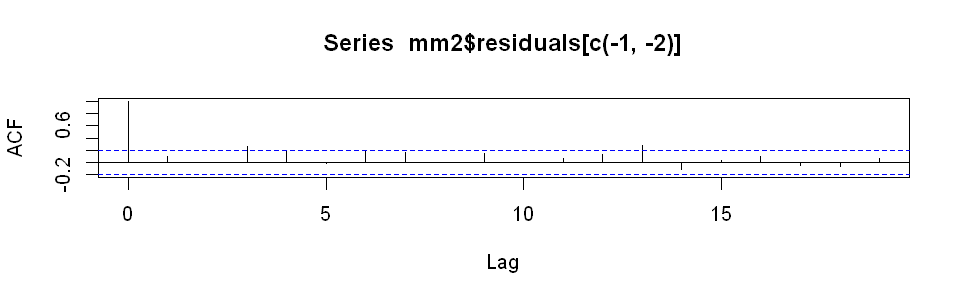

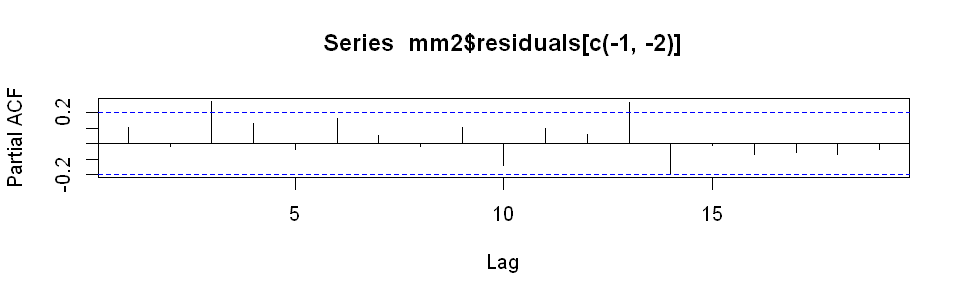

In [73]:
auto.arima(sres)
mm3 <- garch(sres, order=c(0,2))
mm3

acf(mm3$residuals[c(-1,-2)])
pacf(mm3$residuals[c(-1,-2)])

In [79]:
spec <- ugarchspec(variance.model = list(model = "sGARCH", 
                                         garchOrder = c(0, 1), 
                                         submodel = NULL, 
                                         external.regressors = NULL, 
                                         variance.targeting = FALSE), 

                   mean.model     = list(armaOrder = c(0, 6), 
                                         external.regressors = NULL, 
                                         distribution.model = "norm", 
                                         start.pars = list(), 
                                         fixed.pars = list(ma1=0, ma2=0, ma4=0, ma5=0)))

garch <- ugarchfit(spec = spec, data = arch$y_m, solver.control = list(trace=0))
garch

Warning message:
"unidentified option(s) in mean.model:
 distribution.model start.pars fixed.pars"


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(0,1)
Mean Model	: ARFIMA(0,0,6)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error    t value Pr(>|t|)
mu     1.057846    0.033962  31.147816 0.000000
ma1   -0.007793    0.104892  -0.074294 0.940776
ma2    0.025907    0.098912   0.261919 0.793384
ma3    0.250257    0.107122   2.336184 0.019482
ma4   -0.141185    0.113810  -1.240539 0.214776
ma5   -0.116569    0.103580  -1.125397 0.260421
ma6   -0.223367    0.102417  -2.180949 0.029187
omega  0.000000    0.000112   0.000000 1.000000
beta1  0.990925    0.003062 323.569617 0.000000

Robust Standard Errors:
       Estimate  Std. Error    t value Pr(>|t|)
mu     1.057846    0.044705  23.663016  0.00000
ma1   -0.007793    0.142016  -0.054873  0.95624
ma2    0.025907    0.132654   0.195296  0.